<font size=8 color = "#663399" >Machine Learning</font>
- <font size=4>Name: Kasra Noorbakhsh</font>
- <font size=4>SID: 810100230</font>
- <font size=4>In this project we are using Machine Learning to predict different house prices in Boston.</font>

<font size=6 color = "#663399" >Imports and Hyperparameters</font>

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.tree import plot_tree
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report

target_col = 'MEDV'
data_set_path = "C:/Users/Kasra/Desktop/semester 6/AI/Projects/P4/DataSet.xlsx"

<font size=6 color = "#663399" >Data Set</font>

- <font size=4>In our data set we have prices of different houses in Boston with their various features.

    1- Structure. After reading them, using info method we can see the amount of data and each column types in our table. Using describe method we can see some statistical information of each row for example: number of data, min data, max data, and etc.</font>

In [6]:
data = pd.read_excel(data_set_path)

print("Dataset Info:\n")
print(data.info())

print("\nDescriptive Statistics:\n")
print(data.describe())

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     480 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      479 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        486 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB
None

Descriptive Statistics:

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  480.000000  506.000000  506.000000   
mean     1.269195   13.2952

<font size=4>2- Missed data.</font>

In [7]:
missing_values = data.isna().sum()

missing_ratio = missing_values / len(data)

print("Number of missing values in each column:\n")
print(missing_values)

print("\nRatio of missing values in each column:\n")
print(missing_ratio)

Number of missing values in each column:

CRIM        0
ZN          0
INDUS       0
CHAS       26
NOX         0
RM          0
AGE         0
DIS        27
RAD         0
TAX         0
PTRATIO     0
B          20
LSTAT       0
MEDV       54
dtype: int64

Ratio of missing values in each column:

CRIM       0.000000
ZN         0.000000
INDUS      0.000000
CHAS       0.051383
NOX        0.000000
RM         0.000000
AGE        0.000000
DIS        0.053360
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.039526
LSTAT      0.000000
MEDV       0.106719
dtype: float64


<font size=4>3- Unique data. As we can see in the graph some groups like CHAS or RAD have verry few unique datas because for example CHAS has only 0 or 1 value and some groups like CRIM or RM have very unique values.</font>

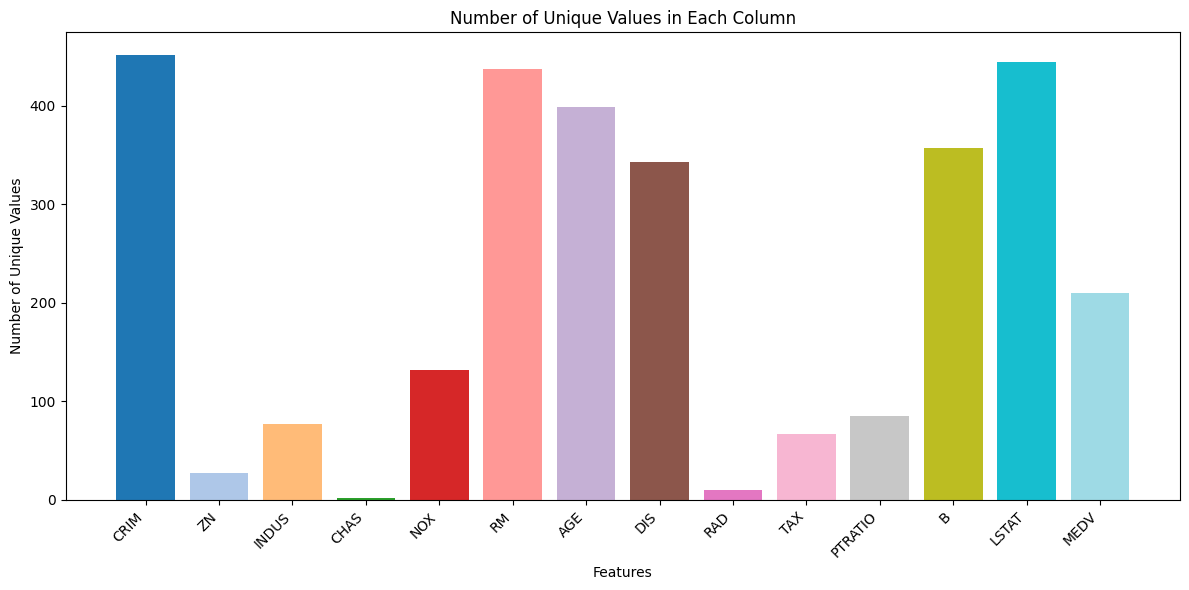

In [8]:
unique_counts = data.nunique()

colors = plt.cm.tab20(np.linspace(0, 1, len(unique_counts)))

plt.figure(figsize=(12, 6))
plt.bar(unique_counts.index, unique_counts.values, color = colors)
plt.xlabel('Features')
plt.ylabel('Number of Unique Values')
plt.title('Number of Unique Values in Each Column')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

<font size=4>4- Correlation. As we can see in the graph below for example RAD and NOX have 0.99 correlation and it is meaningful because RAD is index of accessibility to radial highways and NOX is nitric oxides concentration which they are obviously correlated. In second graph we showed the correlation between features and MEDV. As we can see ```RM``` and ```LSTAT``` are more correlated to the target feature.</font>

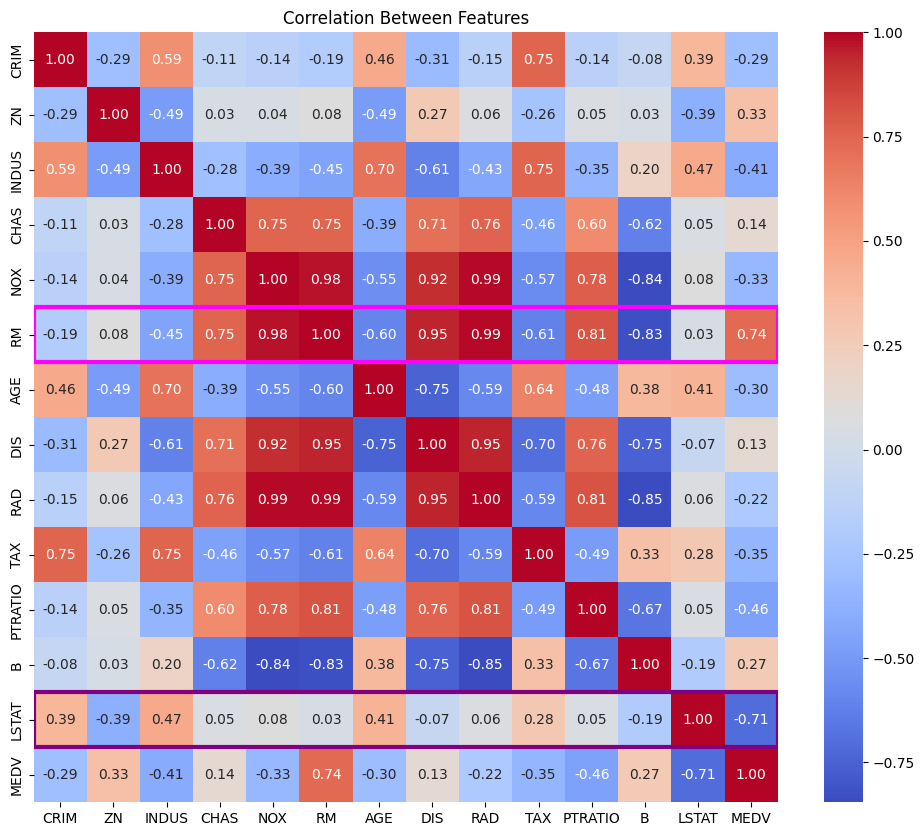

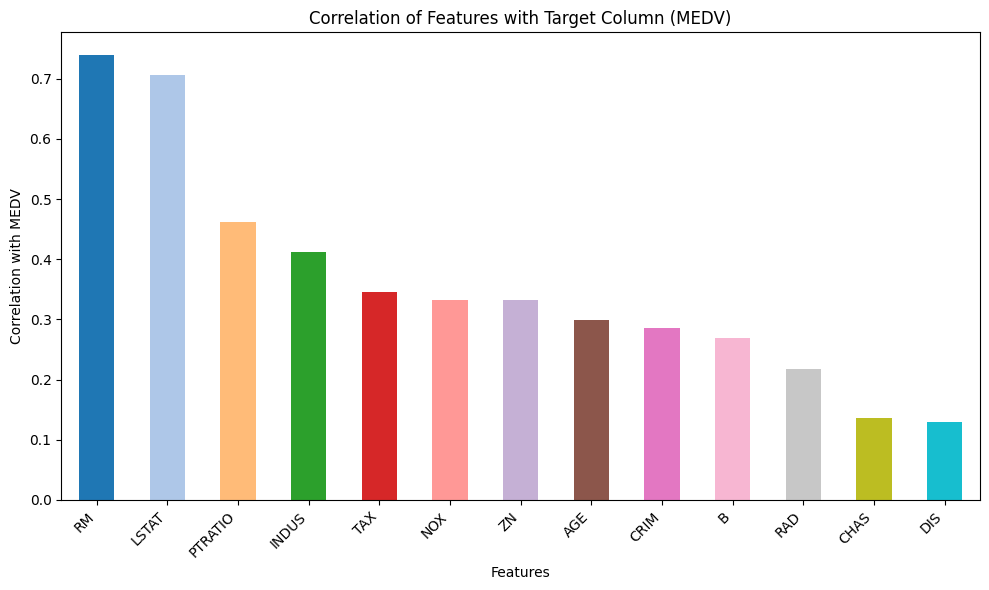

In [9]:
correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title('Correlation Between Features')
rectangle = plt.Rectangle((0, 5), correlation_matrix.shape[1], 1, edgecolor = 'magenta', facecolor = 'none', lw = 3)
rectangle2 = plt.Rectangle((0, 12), correlation_matrix.shape[1], 1, edgecolor = 'purple', facecolor = 'none', lw = 3)
plt.gca().add_patch(rectangle)
plt.gca().add_patch(rectangle2)
plt.show()

target_correlations = correlation_matrix[target_col].drop(target_col)
correlation_with_MEDV = target_correlations.abs().sort_values(ascending = False)

plt.figure(figsize=(10, 6))
correlation_with_MEDV.plot(kind='bar', color = colors)
plt.xlabel('Features')
plt.ylabel('Correlation with MEDV')
plt.title('Correlation of Features with Target Column (MEDV)')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

<font size=4>5- Scatter and Hexbin. 

```scatter``` plot is a graph that displays the values of two variables as points on a two-dimensional plane. It's used to observe the relationship or correlation between the two variables. 

```hexbin``` plot is similar to a scatter plot, but it uses hexagonal bins to represent the distribution of data points. It's particularly useful when dealing with a large number of data points, as it can provide a more informative visualization by aggregating points into hexagonal bins. The color intensity of each hexagon represents the number of points falling within that bin, providing a visual indication of the density of points in different regions of the plot.</font>

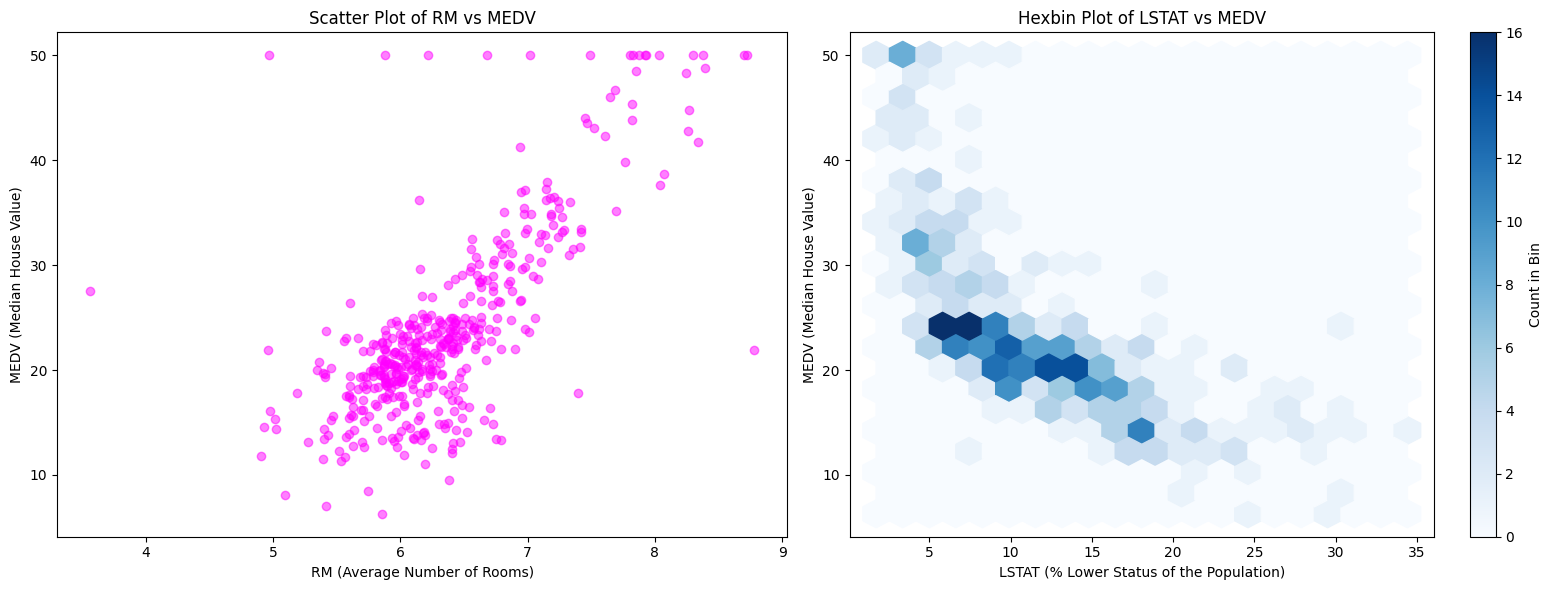

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].scatter(data['RM'], data[target_col], alpha = 0.5, color = 'magenta')
axes[0].set_title('Scatter Plot of RM vs MEDV')
axes[0].set_xlabel('RM (Average Number of Rooms)')
axes[0].set_ylabel('MEDV (Median House Value)')

hb = axes[1].hexbin(data['LSTAT'], data[target_col], gridsize = 20, cmap = 'Blues')
axes[1].set_title('Hexbin Plot of LSTAT vs MEDV')
axes[1].set_xlabel('LSTAT (% Lower Status of the Population)')
axes[1].set_ylabel('MEDV (Median House Value)')
plt.colorbar(hb, ax=axes[1], label='Count in Bin')

plt.tight_layout()
plt.show()

<font size=4>6- Other methods. Another common investigation that can be done on the data is feature importance analysis, particularly in the context of predictive modeling. Feature importance analysis helps identify which features have the most influence on the target variable (in this case, the house prices). Random Forest is a widely-used algorithm for this purpose.</font>

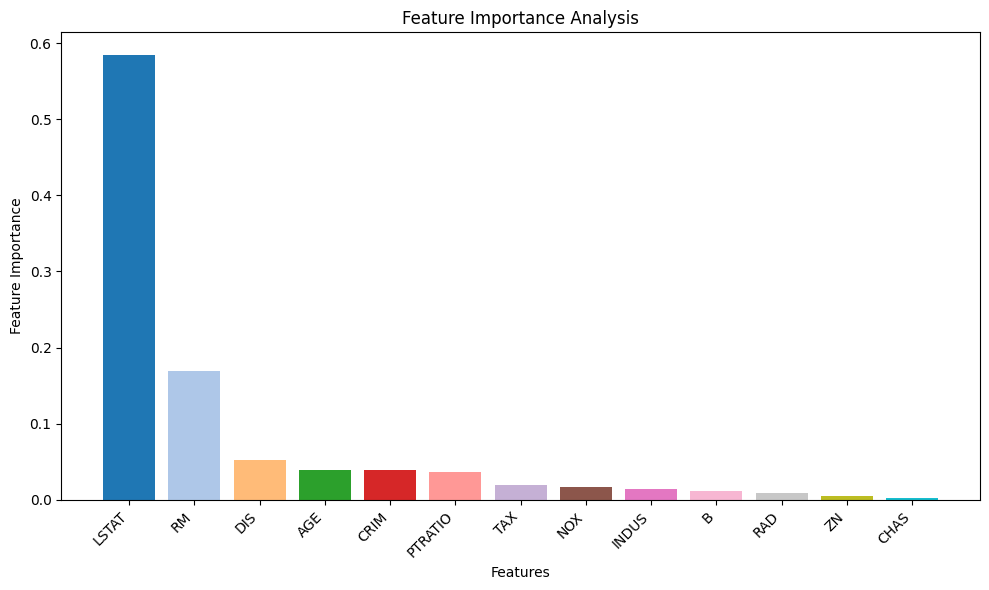

In [11]:
data_filled = data.fillna(data.mean())

X = data_filled.drop(target_col, axis = 1)
y = data_filled[target_col]

rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

rf.fit(X, y)

feature_importances = rf.feature_importances_

indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[indices], color = colors)
plt.xticks(range(X.shape[1]), X.columns[indices], rotation = 45, ha = 'right')
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Analysis')
plt.tight_layout()
plt.show()

<font size=6 color = "#663399" >Preprocess</font>

<font size=4>7- Missing Value. 

```Mean Imputation```:
In mean imputation, missing values in a column are replaced with the mean of that column. This method works well for numeric data with a normal distribution. It may not be suitable for data with outliers, as it can be sensitive to extreme values.

```Median Imputation```:
In median imputation, missing values in a column are replaced with the median of that column. This method is robust to outliers, making it suitable for data with skewed distributions or outliers. It may not accurately capture the true distribution if the data is heavily skewed.

```Mode Imputation```:
In mode imputation, missing values in a column are replaced with the mode (most frequent value) of that column.
This method is suitable for categorical or ordinal data, where mean or median imputation may not be appropriate. Mode imputation preserves the categorical nature of the data and can be useful for maintaining the integrity of categorical features. It may not be suitable for continuous numeric data or data with multiple modes.</font>

In [12]:
data_mean_imputed = data.fillna(data.mean())

missing_values_mean = data_mean_imputed.isna().sum()
missing_ratio_mean = missing_values_mean / len(data_mean_imputed)

print("\nRatio of missing values in each column after mean imputation:\n")
print(missing_ratio_mean)

data_median_imputed = data.fillna(data.median())

missing_values_median = data_median_imputed.isna().sum()
missing_ratio_median = missing_values_median / len(data_median_imputed)

print("\nRatio of missing values in each column after median imputation::\n")
print(missing_ratio_median)

data_mode_imputed = data.fillna(data.mode().iloc[0])

missing_values_mode = data_mode_imputed.isna().sum()
missing_ratio_mode = missing_values_mode / len(data_mode_imputed)

print("\nRatio of missing values in each column after mode imputation::\n")
print(missing_ratio_mode)


Ratio of missing values in each column after mean imputation:

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MEDV       0.0
dtype: float64

Ratio of missing values in each column after median imputation::

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MEDV       0.0
dtype: float64

Ratio of missing values in each column after mode imputation::

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MEDV       0.0
dtype: float64


<font size=4>8- Removing columns. Yes, we can delete columns (features) from our dataset if those columns are not relevant to our analysis or if they contain redundant or uninformative information. Removing unnecessary columns can simplify our dataset, reduce noise, and improve the efficiency of our analysis. I removed ```CHAS``` column because it had low correlation and low importance as seen above.</font>

In [13]:
columns_to_remove = ['CHAS']

num_cols_before = data_median_imputed.shape[1]

data_preproc = data_median_imputed.drop(columns_to_remove, axis = 1)

num_cols_after = data_preproc.shape[1]

print("Number of columns before removal:", num_cols_before)
print("Number of columns after removal:", num_cols_after)

Number of columns before removal: 14
Number of columns after removal: 13


<font size=4>9- Numeric and Categorial. "numeric" features are those that represent continuous or discrete numerical data, such as integers or floating-point numbers. On the other hand, "categorical" or "nominal" features are those that represent categories or groups. </font>

In [14]:
numeric_features = data.select_dtypes(include = ['int64', 'float64']).columns
categorical_features = data.select_dtypes(include = ['object']).columns

print("Numeric Features:\n")
print(numeric_features)

print("\nCategorical Features:\n")
print(categorical_features)

Numeric Features:

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

Categorical Features:

Index([], dtype='object')


<font size=4>10- standardizing or normalizing. These techniques are often applied in machine learning algorithms to ensure that all features contribute equally to the analysis and to improve the convergence and performance of certain algorithms.

```Normalization```: scales the values of a feature to a fixed range, typically between 0 and 1. It is calculated using the formula:

$$𝑋norm =  \frac{𝑋−𝑋min}{𝑋max−𝑋min}$$

```Standardization```: scales the values of a feature to have a **mean** of 0 and a **standard deviation** of 1. Standardization centers the data around the mean and rescales it based on the standard deviation. It is calculated using the formula:

$$𝑋std =  \frac{𝑋−𝜇 }{𝜎}$$


Differences between normalization and standardization:
Normalization preserves the original distribution of the data, while standardization centers the data around the mean and rescales it based on the standard deviation.
Normalization is suitable for algorithms that require features to be on a similar scale, while standardization is suitable for algorithms that assume normally distributed features or when specific scale boundaries are not required. 

> **Does it nead to normalized our dataset in this project?**
<br>
Normalization is not strictly required for **linear regression**, but it can still be beneficial, for example we do not have to work with large numbers and it will reduce the memory, and maybe time, complexity.
<br>
But in **gradient descent**, normaliziation can be a good choice, because it converge faster when the features are normalized. Normalization prevents the weights or coefficients associated with different features from being updated at vastly different rates, which can slow down the learning process.</font>

<font size=4>11- Categorial. 

```Encoding Categorical Variables```: Machine learning algorithms typically require numeric input data. Therefore, categorical variables need to be encoded into numerical format.

```Dimensionality Reduction```: If there are too many categories in a categorical variable, it may lead to the curse of dimensionality and increase the complexity of the model.
Techniques such as feature selection or feature extraction can help reduce the number of categorical variables or combine them into fewer meaningful features.</font>

<font size=4>12- Splitting data. 

```Training Dataset```: The training dataset is the portion of the data used to train or fit the machine learning model. It contains input features (independent variables) and their corresponding target values.

```Validation Dataset```: The validation dataset is a separate portion of the data used to evaluate the performance of the model during training. It helps tune hyperparameters, such as regularization strength or learning rate, and assess model performance on data that it hasn't seen before.

```Test Dataset```: The test dataset is a completely independent dataset used to evaluate the final performance of the trained model.

Some methods for splitting: 

```1- Simple Holdout Method```: the dataset is randomly split into two parts: a training set and a test set. A portion of the data (e.g., 70-80%) is allocated to the training set, and the remaining portion is allocated to the test set.

```2- Train-Validation-Test Split```: the dataset is split into three parts: a training set, a validation set, and a test set. A portion of the data (e.g., 60-70%) is allocated to the training set, a smaller portion (e.g., 15-20%) is allocated to the validation set, and the remaining portion is allocated to the test set.

```3- K-Fold Cross-Validation```: K-fold cross-validation involves dividing the dataset into K subsets, or folds, of approximately equal size. The model is trained K times, each time using K-1 folds as the training data and one fold as the validation data. After cross-validation, the final evaluation can be done on a separate test set.</font>

In [15]:
#before evaluating, I take the preprocessed data
X = data_median_imputed.drop(columns = [target_col])
y = data_median_imputed[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (404, 13)
Test set shape: (102, 13)


<font size=4>13- Other Preprocessings.

```1-Feature Engineering```:
Create new features from existing ones, such as polynomial features, interaction terms, or transformations like log or square root. Select relevant features based on domain knowledge, feature importance analysis, or algorithms like recursive feature elimination.

```2-Principal Component Analysis (PCA)```: 
Transform high-dimensional data into a lower-dimensional space while preserving the most important information.

```3-Feature Selection```: Select a subset of relevant features to reduce dimensionality and improve model performance.

```4-Text Preprocessing```:
Tokenization: Split text into individual words or tokens.
Stopword Removal: Remove common words that do not carry significant meaning, such as "and", "the", etc.
Lemmatization or Stemming: Reduce words to their base or root form to normalize variations.

```5-Handling Outliers```:
Identify and treat outliers using techniques like trimming, winsorization, or replacing outliers with more typical values.</font>

<font size=6 color = "#663399" >Training, Evaluation, and Regularization</font>

<font size=5 color = "#663399" > Linear Regression</font>

<font size=4>14- Supervised Learning.

``1-Supervised``: In supervised learning, the algorithm learns from labeled data, where each example in the dataset is paired with a corresponding target variable or label. The goal is to learn a mapping from input features to output labels, allowing the algorithm to make predictions on new, unseen data. 

Example: Email spam classification, where the algorithm learns to classify emails as spam or ham based on features such as words in the email and sender information.

``2-Unsupervised``: In unsupervised learning, the algorithm learns from unlabeled data, where there are no corresponding target variables or labels. The goal is to uncover hidden patterns, structures, or relationships within the data. 

Example: Customer segmentation, where the algorithm groups customers into segments based on similarities in their purchasing behavior without prior knowledge of customer categories.

``3-Semi-supervised``: Semi-supervised learning lies between supervised and unsupervised learning, where the dataset contains a mix of labeled and unlabeled data. The algorithm leverages both labeled and unlabeled data to improve performance, often by using the unlabeled data to learn a better representation of the underlying data distribution. 

Example: Image classification with a limited number of labeled images and a large pool of unlabeled images. The algorithm can leverage the unlabeled images to improve its understanding of the image space and make better predictions on the labeled images.

``4-Reinforcement Learning``: In reinforcement learning, an agent learns to interact with an environment to achieve a goal by taking actions and receiving feedback in the form of rewards or penalties. The goal of the agent is to learn a policy that maximizes cumulative rewards over time. Reinforcement learning is commonly used in settings where there is no predefined correct output but rather a sequence of actions that lead to desired outcomes. 

Example: Training an AI agent to play a game such as chess, where the agent learns to make moves that maximize its chances of winning based on the rewards received from the game environment.</font>

<font size=4>15- Regression. **Regression** is a supervised learning technique used to predict continuous outcomes or values based on input features. In regression, the target variable is a continuous quantity, such as a price, temperature, and the goal is to learn a mapping from the input features to the target variable. In contrast to classification methods, which aim to predict discrete class labels, regression focuses on predicting continuous values. While both regression and classification are supervised learning techniques, they differ in terms of the nature of the target variable and evaluation metrics.</font>

<font size=4>16- Formulas. The main form is straight forward. The RSS measures the squared differences between the actual target values (𝑦𝑖) and the predicted values (𝑦^𝑖=𝛽^+ 𝛼^𝑥𝑖) for each data point i. After this, To find the optimal parameters 𝛼^ and 𝛽^, the derivatives of the RSS function with respect to 𝛼 and 𝛽 are computed and set equal to zero.</font>

Main form of simple linear regression function:
$$f(x) = \alpha x + \beta$$

here we want to find the bias ($\alpha$) and slope($\beta$) by minimizing the derivation of the Residual Sum of Squares (RSS) function:

- step 1: Compute RSS of the training data  

$$ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} * x_i) )^2 $$

- step 2: Compute the derivatives of the RSS function in terms of $\alpha$ and $\beta$, and set them equal to 0 to find the desired parameters

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} * x_i) = 0$$
$$ \to \beta = \hat{y} - \hat{\alpha} \hat{x} \to (1)$$


$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$

$$ (1) , (2) \to \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$
$$ \hat{\beta} = y - \hat{a} x$$



Based on the above formula, implement the function below to compute the parameters of a simple linear regression

In [16]:
def linear_regression(input, output):
  xmean = np.mean(input)
  ymean = np.mean(output)

  alpha = np.sum((input - xmean) * (output - ymean)) / np.sum(np.power(input - xmean, 2))
  beta = ymean - alpha * xmean
  
  return (alpha, beta)

Now complete this `get_regression_predictions(...)` function to predict the value of given data based on the calculated intercept and slope

In [17]:
def get_regression_predictions(input, intercept, slope):
    return slope * input + intercept

Now that we have a model and can make predictions, let's evaluate our model using Root Mean Square Error (RMSE). RMSE is the square root of the mean of the squared differences between the residuals, and the residuals is just a fancy word for the difference between the predicted output and the true output.

Complete the following function to compute the RSME of a simple linear regression model given the input_feature, output, intercept and slope:

In [18]:
def get_root_mean_square_error(predicted_values, actual_values):
  mean_square = np.mean(np.power(predicted_values - actual_values, 2))
  return np.sqrt(mean_square)

The RMSE has no bound, thus it becomes challenging to determine whether a particular RMSE value is considered good or bad without any reference point. Instead, we use R2 score. The R2 score is calculated by comparing the sum of the squared differences between the actual and predicted values of the dependent variable to the total sum of squared differences between the actual and mean values of the dependent variable. The R2 score is formulated as below:

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

Complete the following function to calculate the R2 score of a given input_feature, output, bias, and slope:

In [19]:
def get_r2_score(predicted_values, actual_values):
  sum_square = np.sum(np.power(predicted_values - actual_values, 2))
  var_true = actual_values.shape[0] * np.var(actual_values)
  return (1 - (sum_square / var_true))

Now calculate the fitness of the model.
Remember to provide explanation for the outputs in your code!

In [20]:
#before evaluating, I take the preprocessed data
correlation_matrix = data_median_imputed.corr()
target_correlations = correlation_matrix[target_col].drop(target_col)
sorted_correlations = target_correlations.abs().sort_values(ascending = False)

designated_feature_list = sorted_correlations.index[:4]
print(f"{'Feature': <{18}} {'R2': <{4}}  {'RMSE'}")

for feature in designated_feature_list:
    alpha, beta = linear_regression(X_train[feature].to_numpy(), y_train.to_numpy().flatten())
    predicted = get_regression_predictions(X_test[feature].to_numpy(), beta, alpha)
    r2_score = get_r2_score(predicted, y_test.to_numpy().flatten())
    rmse = get_root_mean_square_error(predicted, y_test.to_numpy().flatten())
    print(f"{feature: <{18}} {r2_score:.2f}  {rmse:.2f}")

Feature            R2    RMSE
LSTAT              0.48  5.55
INDUS              0.14  7.11
ZN                 0.24  6.72
CRIM               -0.00  7.70


<font size=4>17- Feature. The order of features is based on their higher correlation with the target feature. </font>

<font size=4>18- Evaluation Scoring Methods. 

```1-Residual Sum of Squares (RSS)```: RSS measures the sum of the squared differences between the actual target values and the predicted values by the regression model. It quantifies the overall discrepancy between the observed and predicted values. RSS is calculated as: $$ RSS = \sum_{i=1}^{n} (y_i - \hat{𝑦_i})^2 $$


```2-Mean Squared Error (MSE)```: MSE is the average of the squared differences between the actual and predicted values. It provides a measure of the average magnitude of errors between predicted and actual values. MSE is calculated as: $$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{𝑦_i})^2 $$


```3-Root Mean Squared Error (RMSE)```: RMSE is the square root of the MSE and is expressed in the same units as the target variable. It provides a measure of the average magnitude of errors in the same units as the target variable. RMSE is a popular metric for evaluating the accuracy of regression models. RMSE is calculated as: $$ RMSE = \sqrt{MSE}$$

```4-R-squared (R2) Score```: R2 score represents the proportion of the variance in the dependent variable (target) that is explained by the independent variables (features) in the model. It is a measure of how well the regression model fits the data. R2 score ranges from 0 to 1, where 1 indicates a perfect fit and 0 indicates no improvement over a baseline model. R2 score is calculated as: $$ R^2 = 1 - \frac{RSS}{TSS}$$ where TSS (Total Sum of Squares) is the sum of the squared differences between the actual target values and the mean of the target variable.</font>

<font size=4>19- results. As we expected, as the correlation **decreases**, the R2 score also **decreases**. This indicates that features with higher correlation tend to have a stronger influence on the target variable, resulting in higher predictive power. Linear regression is a simple model that may not fully capture the complex relationships between features. Therefore, the R2 score, which measures the goodness of fit for the model, may not be very high. Linear regression is limited in its ability to understand intricate and **nonlinear relationships** among features. </font>

<font size=4>20- Scatter Plot. </font>

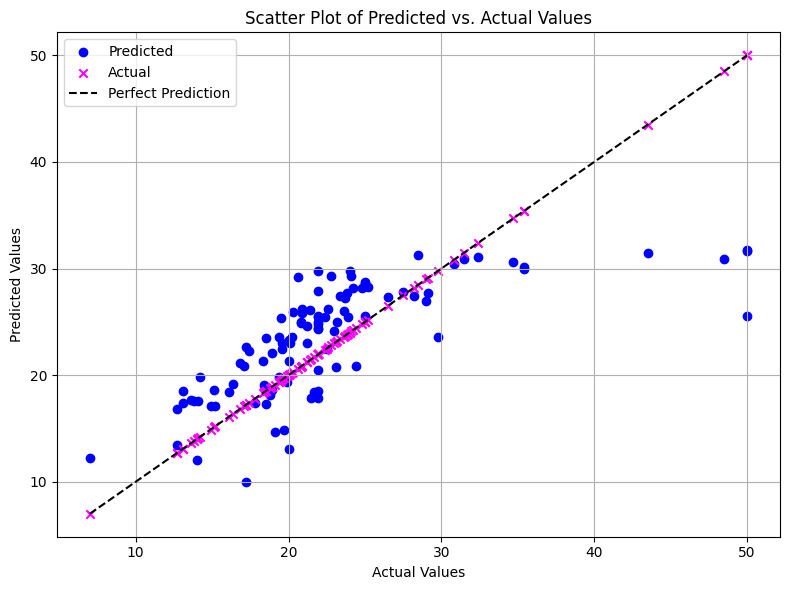

In [21]:
alpha, beta = linear_regression(X_train[designated_feature_list[0]].to_numpy(), y_train.to_numpy().flatten())
predicted = get_regression_predictions(X_test[designated_feature_list[0]].to_numpy(), beta, alpha)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicted, color = 'blue', label = 'Predicted', marker = 'o')  
plt.scatter(y_test, y_test, color = 'magenta', label = 'Actual', marker = 'x') 

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'black', linestyle = '--', label = 'Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs. Actual Values')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

<font size=5 color = "#663399" > Ploynomial Regression</font>

To extend the simple linear regression to polynomial regression, we can model the relationship between the independent variable $x$ and the dependent variable $y$ as a polynomial function of degree $n$:

$$f(x) = \beta_0 + \beta_1x + \beta_2x^2 + \ldots + \beta_nx^n$$

The steps to find the parameters $\beta_i$ are similar to those in simple linear regression. We again minimize the RSS function by taking the derivatives with respect to each parameter and setting them to 0.

- Step 1: Compute the RSS function for polynomial regression:

$$ RSS = \Sigma (y_i - (\hat{\beta_0} + \hat{\beta_1}x_i + \hat{\beta_2}x_i^2 + \ldots + \hat{\beta_n}x_i^n))^2 $$

- Step 2: Compute the derivatives of the RSS function with respect to each parameter $\beta_i$ and set them to 0 to find the desired parameters.

$$ \frac{\partial RSS}{\partial \beta_i} = 0, \text{ for } i = 0, 1, 2, \ldots, n$$

Solving these equations will give us the optimal values of $\beta_i$ for the polynomial regression model. The specific form of the equations will depend on the degree of the polynomial and the number of parameters.

The general form for finding the coefficients for polynomial regression can be represented as:

$$ \beta = (X^T X)^{-1} X^T y $$

where:
- $X$ is the design matrix with columns $x^0, x^1, x^2, ..., x^n$
- $x^i$ represents the feature vector of $x$ raised to the power of $i$
- $y$ is the target variable vector
- $\beta$ is the coefficient vector for the polynomial regression

By solving for $\beta$ using the above formula, we can obtain the coefficients for the polynomial regression model.

In [22]:
def polynomial_regression(x, y, degree):
  pass
  #TO DO

<font size=5 color = "#663399" > Computing the Derivative</font>

As we saw, the cost function is the sum over the data points of the squared difference between an observed output and a predicted output.

Since the derivative of a sum is the sum of the derivatives, we can compute the derivative for a single data point and then sum over data points. We can write the squared difference between the observed output and predicted output for a single point as follows:

$$
(output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))^2
$$

With n feautures and a const , So the derivative will be :


$$
2 * (output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))
$$

The term inside the paranethesis is just the error (difference between prediction and output). So we can re-write this as:

$$2 * error*[feature_i] $$


That is, the derivative for the weight for feature i is the sum (over data points) of 2 times the product of the error and the feature itself. In the case of the constant then this is just twice the sum of the errors!

Recall that twice the sum of the product of two vectors is just twice the dot product of the two vectors. Therefore the derivative for the weight for feature_i is just two times the dot product between the values of feature_i and the current errors.


With this in mind, complete the following derivative function which computes the derivative of the weight given the value of the feature (over all data points) and the errors (over all data points).


In [23]:
def feature_derivative(errors, feature):
  #TO DO
  pass

<font size=5 color = "#663399" > Gradient Descent</font>

Now we will write a function that performs a gradient descent. The basic premise is simple. Given a starting point we update the current weights by moving in the negative gradient direction. Recall that the gradient is the direction of increase and therefore the negative gradient is the direction of decrease and we're trying to minimize a cost function.


The amount by which we move in the negative gradient direction is called the 'step size'. We stop when we are 'sufficiently close' to the optimum. We define this by requiring that the magnitude (length) of the gradient vector to be smaller than a fixed 'tolerance'.


With this in mind, complete the following gradient descent function below using your derivative function above. For each step in the gradient descent we update the weight for each feature befofe computing our stopping criteria.

In [24]:
# Utility functions for multiple regression

def normalize_features(chosen_features, data_frame):
    for feature in chosen_features:
        data_frame[feature] = (data_frame[feature] - data_frame[feature].mean()) / data_frame[feature].std()
    return data_frame

def predict_output(feature_matrix, weights, bias):
    #TO DO FOR POLYNOMIAL REGRESSION PREDICTION
    return predictions

<font size=5 color = "#663399" > Polynomial Regression Using Gradient Descent</font>

Polynomial regression using gradient descent involves finding the optimal parameters for a polynomial model by iteratively updating them based on the gradient of a loss function, typically the Mean Squared Error (MSE). The steps involved are as follows:

- **Step 1: Define the polynomial model**
The polynomial model has the form:
$$f(x) = \beta_0 + \beta_1x + \beta_2x^2 + \ldots + \beta_nx^n$$

- **Step 2: Define the loss function**
The loss function, such as Mean Squared Error (MSE), measures the error between the actual target values and the predicted values by the model.

- **Step 3: Initialize the coefficients**
Start with initial guesses for the coefficients $\beta_0, \beta_1, \ldots, \beta_n$

- **Step 4: Update the coefficients using Gradient Descent**
Iteratively update the coefficients to minimize the loss function. This is done by computing the gradient of the loss function with respect to each coefficient and making small adjustments in the opposite direction of the gradient.

- **Step 5: Repeat until convergence**
Continue updating the coefficients iteratively until the algorithm converges to the optimal values.

- **Step 6: Use the learned coefficients for prediction**
Once the coefficients converge, they can be used in the polynomial function to make predictions on new data points.

Overall, polynomial regression using gradient descent is an iterative optimization process that aims to find the best-fitting polynomial curve to the data points by minimizing the prediction errors. The learning rate and the number of iterations are key hyperparameters to tune for efficient convergence and accurate modeling.



In [25]:
def polynomial_regression_gradient_descent(feature_matrix, outputs, initial_weights,bias, step_size, tolerance):
    weights = np.array(initial_weights)

    while True:
        # Compute predictions using polynomial function and errors
        #TO DO

        # Compute derivatives for all weights
        #TO DO

        # Update weights and bias
        #TO DO

        # Check convergence
        #TO DO

    # return weights, bias
        pass

In [26]:

def run_polynomial_regression(chosen_feature_matrix, target_matrix, keywords):
    initial_weights = keywords['initial_weights']
    step_size = keywords['step_size']
    tolerance = keywords['tolerance']
    bias = keywords['bias']
    weights = np.array(initial_weights)
    weights, bias = polynomial_regression_gradient_descent(chosen_feature_matrix, target_matrix, weights, bias, step_size, tolerance)

    return weights, bias

def get_weights_and_bias(chosen_features):

    keywords = {
        'initial_weights': np.array([.5]*len(chosen_features)),
        'step_size': 1.e-4,
        'tolerance': 1.e-10,
        'bias': 0
    }

    # TO DO

    return chosen_feature_matrix, train_weights, bias

<font size=5 color = "#663399" > Classification</font>

<font size=4>21- Pruning. Pruning in decision trees refers to the process of ```removing certain branches``` or nodes from the tree in order to improve its performance or generalization ability. Pruning can help prevent overfitting, reduce the complexity of the tree, and improve its interpretability. Here are the pros and cons of pruning in decision trees:

**Pros**:

```1-Prevents Overfitting```: Pruning helps prevent overfitting by removing unnecessary branches or nodes that capture noise or outliers in the training data. This results in a simpler and more generalized tree that performs better on unseen data.

```2-Reduces Computational Complexity```: Pruning reduces the computational complexity of the tree, making it faster to build and evaluate. This can be especially beneficial for large datasets or real-time applications where computational resources are limited.

```3-Enhances Robustness```: A pruned decision tree is less sensitive to small variations in the training data, resulting in a more robust model that generalizes well to new, unseen data. This leads to more stable and reliable predictions in practice.

**Cons**:

```1-Information Loss```: Pruning can lead to information loss by removing potentially useful branches or nodes from the tree. If pruning is too aggressive, it may remove important decision boundaries, resulting in decreased model performance.

```2-Subjectivity in Pruning Criteria```: Determining the optimal pruning strategy, such as when to stop pruning or which branches to remove, often involves subjective judgment. Different pruning techniques and criteria may lead to different pruned trees, making it challenging to find the best approach.

```3-Risk of Underfitting```: If pruning is overly aggressive, it may lead to underfitting, where the pruned tree is too simple to capture the underlying patterns in the data. This can result in poor performance on both the training and test datasets. </font>

<font size=4>22- Decision Trees. Decision trees are beneficial over other models in scenarios where interpretability, nonlinear relationships, mixed data types, and scalability are important considerations. They offer a versatile and powerful tool for a wide range of machine learning tasks and are particularly well-suited for exploratory analysis, decision support systems, and domains where transparency and explainability are paramount.</font>

<font size=4>23- KNN. One of the key differences between KNN and other classification methods like neural networks or logistic regression lies in their training approach and prediction process. KNN is a lazy learner that memorizes the training data and makes predictions based on the nearest neighbors, while neural networks and logistic regression are eager learners that learn a mapping from inputs to outputs during a dedicated training phase. Additionally, KNN tends to have higher complexity during inference, while neural networks and logistic regression models are more scalable and generalize well to unseen data.</font>

<font size=4>24- One Nearest Neighbor. One of the nearest neighbor algorithms is the classic k-Nearest Neighbors (KNN) algorithm, where k is set to 1. In this algorithm, predictions for a new data point are made based on the class label of the single nearest neighbor in the training dataset.

Algorithm:

Training Phase: During training, the KNN algorithm simply stores the entire training dataset, consisting of feature vectors and corresponding class labels.
Prediction Phase: To make predictions for a new data point, the algorithm calculates the distance between the new instance and every instance in the training dataset using a distance metric. It identifies the single nearest neighbor, i.e., the training instance with the smallest distance to the new data point. The predicted class label for the new data point is then determined by the class label of the nearest neighbor.

**Pros**:

```1-Simplicity```: One of the main advantages of the 1-NN algorithm is its simplicity. It is easy to understand and implement, making it a straightforward baseline model for classification tasks.

```2-Non-parametric```: KNN is a non-parametric algorithm, meaning it does not make any assumptions about the underlying distribution of the data. It can capture complex decision boundaries and is well-suited for nonlinear classification tasks.

**Cons**:

```1-High Computational Cost```: The main drawback of the 1-NN algorithm is its high computational cost during inference. For each prediction, the algorithm needs to calculate the distance between the new instance and every instance in the training dataset, which can be computationally expensive for large datasets.

```2-Sensitivity to Noise and Outliers```: KNN is sensitive to noise and outliers in the data. Since predictions are based solely on the nearest neighbor, noisy or outlier instances can have a significant impact on the predictions, leading to potentially inaccurate results. </font>

<font size=4>25- Distance Metrics. 

```1-Euclidean Distance```: Euclidean distance is the most widely used distance metric in KNN. It calculates the straight-line distance between two points in Euclidean space.
Euclidean distance is sensitive to the scale of the features, and it assumes that all features contribute equally to the distance calculation. It is calculated by: $$\text{Euclidean Distance}(p, q) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2} $$

```2-Manhattan Distance```: Manhattan distance, also known as city block distance or L1 distance, measures the distance between two points by summing the absolute differences of their coordinates. Manhattan distance is less sensitive to outliers and can be more appropriate when dealing with high-dimensional data. It is calculated by: $$\text{Manhattan Distance}(p, q) = \sum_{i=1}^{n} |p_i - q_i| $$

```3-Minkowski Distance```: Minkowski distance is a generalization of both Euclidean and Manhattan distances.
It is defined as: $$\text{Minkowski Distance}(p, q) = \left(\sum_{i=1}^{n} |p_i - q_i|^r\right)^{\frac{1}{r}} $$ The parameter 𝑟 controls the sensitivity to different dimensions. When r=1, it becomes Manhattan distance, and when r=2, it becomes Euclidean distance.

```4-Cosine Similarity```: Cosine similarity measures the cosine of the angle between two vectors in a multidimensional space. It is often used for text mining and recommendation systems. Cosine similarity ranges from -1 to 1, with higher values indicating greater similarity. It is calculated by: $$\text{Cosine Similarity}(p, q) = \frac{\sum_{i=1}^{n} p_i \times q_i}{\sqrt{\sum_{i=1}^{n} p_i^2} \times \sqrt{\sum_{i=1}^{n} q_i^2}} $$</font>

<font size=4>26 & 27- Evaluating. ```GridSearchCV``` is a technique used for hyperparameter tuning in machine learning. It systematically searches for the best combination of hyperparameters for a given model by exhaustively evaluating all possible combinations within a specified grid of hyperparameter values.

Grid of Hyperparameters: You define a grid of hyperparameters that you want to optimize for your model. Each hyperparameter can take on multiple values.
Cross-Validation: GridSearchCV performs cross-validation on the training data. It splits the training data into multiple folds (default is 5), where each fold is used as a validation set while the rest are used for training.
Model Training and Evaluation: For each combination of hyperparameters in the grid, GridSearchCV trains a new model using the training data and evaluates its performance using cross-validation. It calculates a performance metric for each combination.
Best Hyperparameters: After evaluating all combinations, GridSearchCV identifies the combination of hyperparameters that results in the best performance metric on the validation sets.</font>

In [27]:
def label_home_type(price):
    if price >= data_median_imputed[target_col].quantile(0.75):
        return 'Luxury'
    elif price <= data_median_imputed[target_col].quantile(0.25):
        return 'Economical'
    else:
        return 'Normal'

data_median_imputed['home_type'] = data_median_imputed[target_col].apply(label_home_type)

X = data_median_imputed.drop([target_col, 'home_type'], axis = 1) 
y = data_median_imputed['home_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

dt_classifier = DecisionTreeClassifier(max_depth = 5, min_samples_split = 4, min_samples_leaf = 2, random_state = 42)
dt_classifier.fit(X_train, y_train)

knn_classifier = KNeighborsClassifier(n_neighbors = 4, weights = 'uniform')
knn_classifier.fit(X_train, y_train)

dt_accuracy = dt_classifier.score(X_test, y_test)
knn_accuracy = knn_classifier.score(X_test, y_test)

print("Decision Tree Classifier Accuracy:", dt_accuracy)
print("K-Nearest Neighbors Classifier Accuracy:", knn_accuracy)

Decision Tree Classifier Accuracy: 0.8235294117647058
K-Nearest Neighbors Classifier Accuracy: 0.7843137254901961


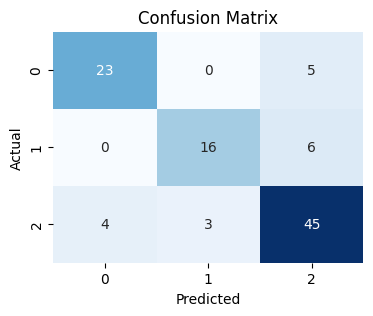

Best Decision Tree Classifier Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Decision Tree Classifier Score: 0.7945987654320987
Best Decision Tree Classifier Test Accuracy: 0.8235294117647058
Decision Tree Classifier Classification Report:
               precision    recall  f1-score   support

  Economical       0.85      0.82      0.84        28
      Luxury       0.84      0.73      0.78        22
      Normal       0.80      0.87      0.83        52

    accuracy                           0.82       102
   macro avg       0.83      0.80      0.82       102
weighted avg       0.83      0.82      0.82       102



In [28]:
dt_param_grid = {
    'max_depth': [None, 5, 10, 15],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}

dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state = 42), dt_param_grid, cv = 5)

dt_grid_search.fit(X_train, y_train)
best_dt_params = dt_grid_search.best_params_
best_dt_score = dt_grid_search.best_score_

best_dt_classifier = DecisionTreeClassifier(**best_dt_params, random_state = 42)
best_dt_classifier.fit(X_train, y_train)

best_dt_accuracy = best_dt_classifier.score(X_test, y_test)
y_pred_dt = best_dt_classifier.predict(X_test)
dt_classification_report = classification_report(y_test, y_pred_dt)

cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Best Decision Tree Classifier Hyperparameters:", best_dt_params)
print("Best Decision Tree Classifier Score:", best_dt_score)
print("Best Decision Tree Classifier Test Accuracy:", best_dt_accuracy)
print("Decision Tree Classifier Classification Report:\n", dt_classification_report)

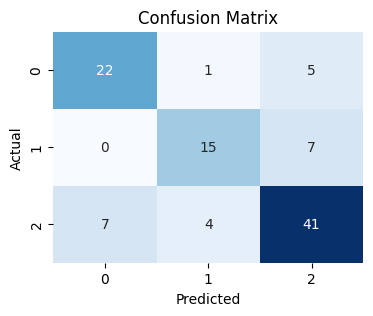

Best K-Nearest Neighbors Classifier Hyperparameters: {'n_neighbors': 4, 'weights': 'distance'}
Best K-Nearest Neighbors Classifier Score: 0.7226543209876543
Best K-Nearest Neighbors Classifier Test Accuracy: 0.7647058823529411
K-Nearest Neighbors Classifier Classification Report:
               precision    recall  f1-score   support

  Economical       0.76      0.79      0.77        28
      Luxury       0.75      0.68      0.71        22
      Normal       0.77      0.79      0.78        52

    accuracy                           0.76       102
   macro avg       0.76      0.75      0.76       102
weighted avg       0.76      0.76      0.76       102



In [29]:
knn_param_grid = {
    'n_neighbors': range(1, 20),  
    'weights': ['uniform', 'distance'] 
}

knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv = 5)

knn_grid_search.fit(X_train, y_train)
best_knn_params = knn_grid_search.best_params_
best_knn_score = knn_grid_search.best_score_

best_knn_classifier = KNeighborsClassifier(**best_knn_params)
best_knn_classifier.fit(X_train, y_train)

best_knn_accuracy = best_knn_classifier.score(X_test, y_test)
y_pred_knn = best_knn_classifier.predict(X_test)
knn_classification_report = classification_report(y_test, y_pred_knn)

cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Best K-Nearest Neighbors Classifier Hyperparameters:", best_knn_params)
print("Best K-Nearest Neighbors Classifier Score:", best_knn_score)
print("Best K-Nearest Neighbors Classifier Test Accuracy:", best_knn_accuracy)
print("K-Nearest Neighbors Classifier Classification Report:\n", knn_classification_report)


<font size=4>28- Final Tree. </font>

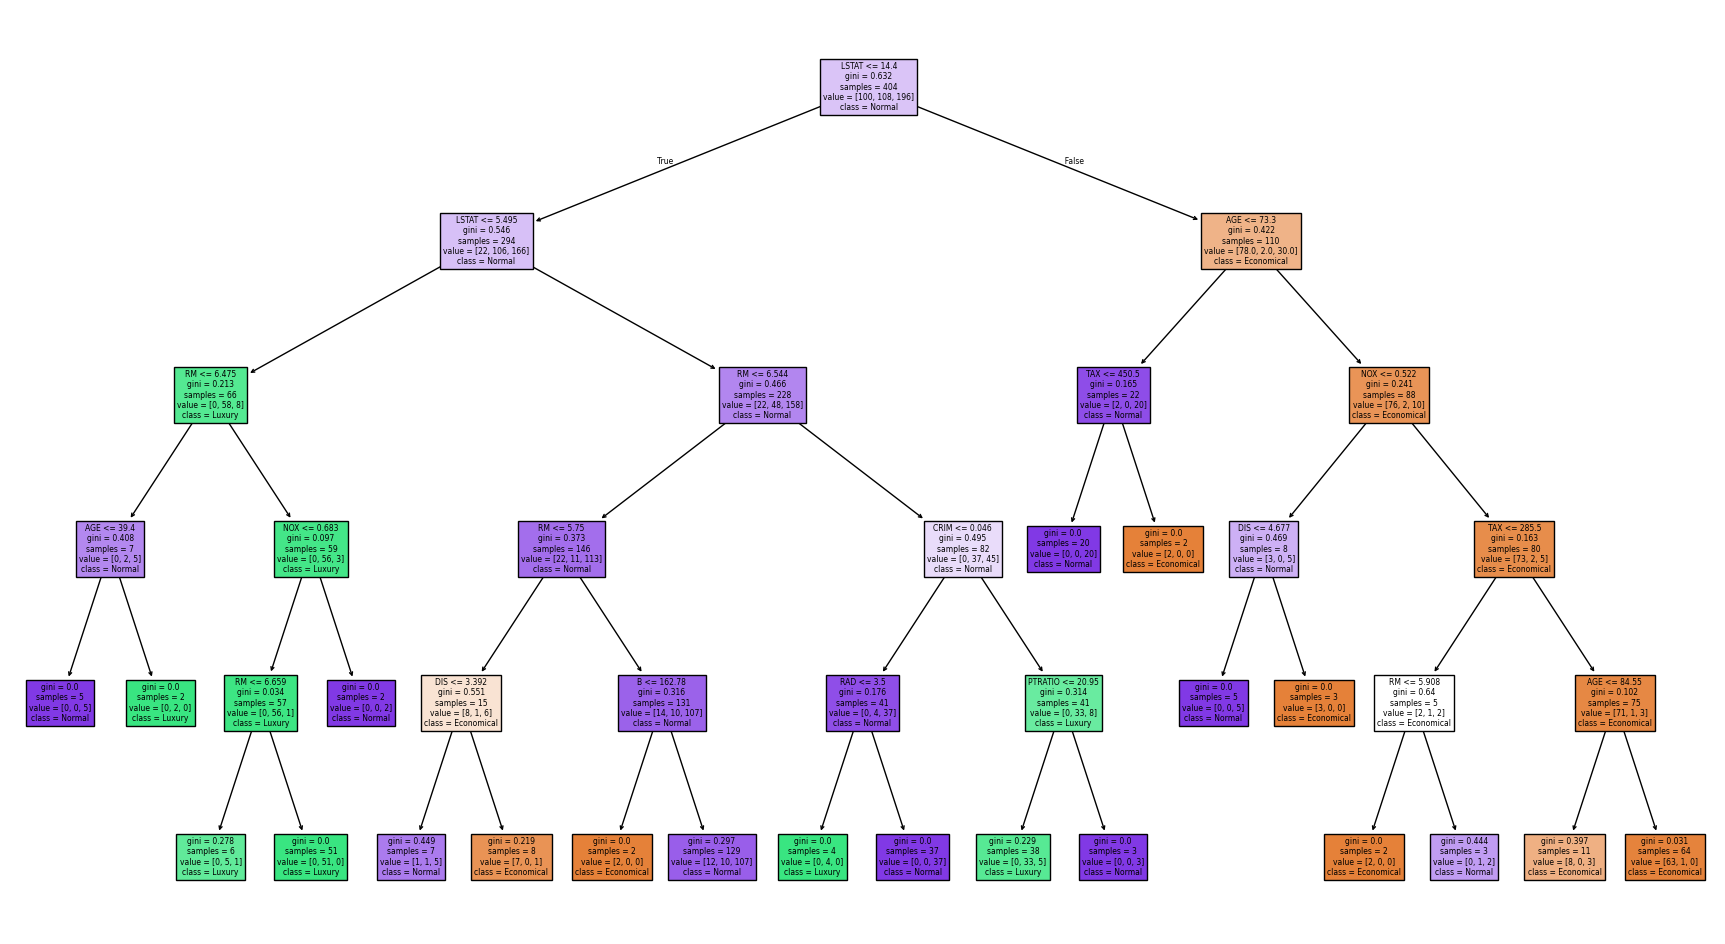

In [30]:
plt.figure(figsize=(22, 12))
plot_tree(best_dt_classifier, filled = True, feature_names = X.columns, class_names = best_dt_classifier.classes_)
plt.show()

<font size=4>29- Underfitting & Overfitting. 

```Underfitting```:
Underfitting occurs when the model is too simple to capture the underlying structure of the data. Signs of underfitting include: Low accuracy or performance on both the training and testing datasets. The model performs poorly even on the training data. In decision trees, underfitting might occur if the tree is too shallow or has too few nodes to capture complex relationships in the data.

```Overfitting```:
Overfitting occurs when the model is too complex and captures noise or random fluctuations in the training data, leading to poor performance on unseen data.Signs of overfitting include: High accuracy or performance on the training dataset but poor performance on the testing dataset. The model memorizes the training data instead of learning general patterns. In decision trees, overfitting might occur if the tree is too deep or has too many branches, resulting in small subsets of data being fitted perfectly but not generalizing well to unseen data.

In the code below we can see that if our models are dealing with these 2 or not.</font>

Assessing Decision Tree Model:
Training Accuracy: 0.9108910891089109
Testing Accuracy: 0.8235294117647058
The model may be overfitting.


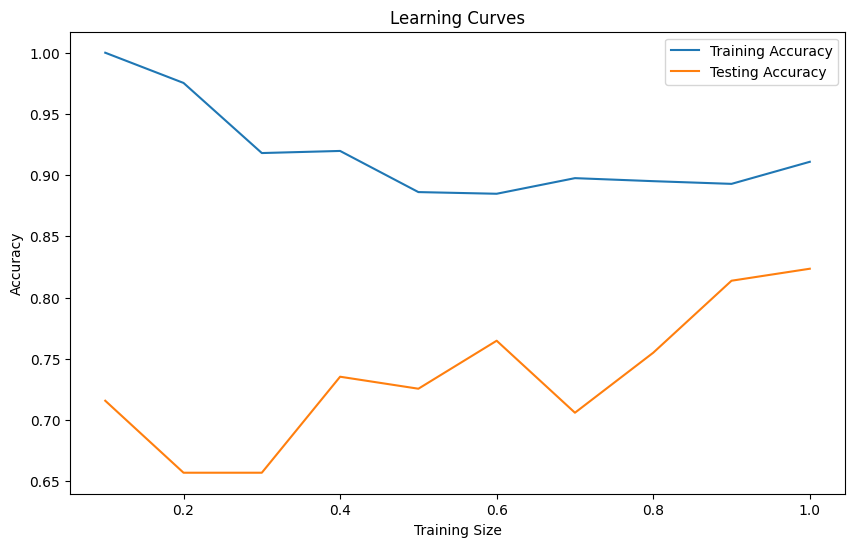

Assessing K-Nearest Neighbors Model:
Training Accuracy: 1.0
Testing Accuracy: 0.7647058823529411
The model may be overfitting.


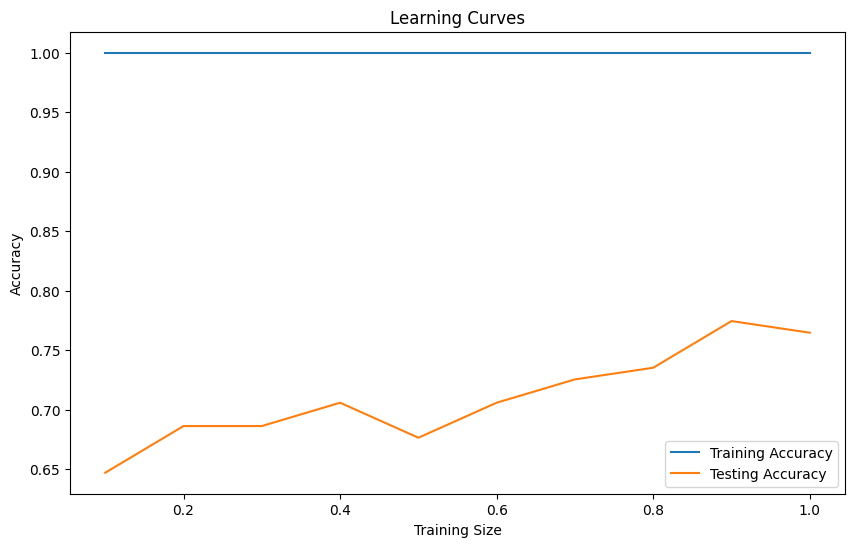

In [31]:
def assess_overfitting_underfitting(model, X_train, y_train, X_test, y_test):
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print("Training Accuracy:", train_accuracy)
    print("Testing Accuracy:", test_accuracy)
    
    if train_accuracy > test_accuracy:
        print("The model may be overfitting.")
    elif train_accuracy < test_accuracy:
        print("The model may be underfitting.")
    else:
        print("The model is likely well-fitted.")
    
    return train_accuracy, test_accuracy

def plot_learning_curves(model, X_train, y_train, X_test, y_test):
    train_sizes = np.linspace(0.1, 1.0, 10)
    train_sizes_abs = np.ceil(train_sizes * len(X_train)).astype(int)
    
    train_scores = []
    test_scores = []
    
    for train_size in train_sizes_abs:
        model.fit(X_train[:train_size], y_train[:train_size])
        train_accuracy = model.score(X_train[:train_size], y_train[:train_size])
        test_accuracy = model.score(X_test, y_test)
        
        train_scores.append(train_accuracy)
        test_scores.append(test_accuracy)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores, label = "Training Accuracy")
    plt.plot(train_sizes, test_scores, label = "Testing Accuracy")
    plt.xlabel("Training Size")
    plt.ylabel("Accuracy")
    plt.title("Learning Curves")
    plt.legend()
    plt.show()

print("Assessing Decision Tree Model:")
train_accuracy_dt, test_accuracy_dt = assess_overfitting_underfitting(best_dt_classifier, X_train, y_train, X_test, y_test)
plot_learning_curves(best_dt_classifier, X_train, y_train, X_test, y_test)

print("Assessing K-Nearest Neighbors Model:")
train_accuracy_knn, test_accuracy_knn = assess_overfitting_underfitting(best_knn_classifier, X_train, y_train, X_test, y_test)
plot_learning_curves(best_knn_classifier, X_train, y_train, X_test, y_test)

<font size=5 color = "#663399" > Ensemble Methods</font>

<font size=4>30- Esemble Methods. Ensemble methods combine multiple models to improve predictive performance and generalization. 
They are important today because, they reduce overfitting by combining diverse models, They enhance prediction accuracy by leveraging the strengths of different models, They provide robustness against noise and outliers, and They are versatile and can be applied to various machine learning tasks.</font>

<font size=4>31- Bagging & Boosting. 

```Bagging (Bootstrap Aggregating)```: Bagging involves training multiple instances of a base learner (e.g., decision tree) on different subsets of the training data, sampled with replacement (bootstrap sampling). Each model is trained independently, and predictions are made by aggregating the predictions of all models (e.g., averaging for regression, voting for classification). The goal of bagging is to reduce variance and improve stability by averaging out the predictions of multiple models. Popular algorithms that use bagging include Random Forest.

```Boosting```: Boosting involves training multiple weak learners sequentially, where each learner focuses on the mistakes made by its predecessors. In boosting, the weight of each training instance is adjusted iteratively based on whether it was correctly or incorrectly classified by the previous models. Boosting aims to improve model performance by focusing on difficult-to-classify instances and gradually reducing bias. Popular algorithms that use boosting include Gradient Boosting, and XGBoost.

Key Differences:

```1-Training Process```: Bagging trains multiple models independently in parallel, while boosting trains models sequentially, with each model learning from the mistakes of its predecessors.

```2-Instance Weights```: In bagging, all training instances have equal weights, and each model is trained on a random subset of the data with replacement. In boosting, instance weights are adjusted iteratively, with more emphasis placed on misclassified instances in subsequent iterations.

```3-Model Aggregation```: Bagging aggregates predictions by averaging (for regression) or voting (for classification) across multiple models. Boosting combines predictions by giving more weight to predictions made by stronger models in the ensemble.</font>

<font size=4>32- Random Forest. Steps taken by it: 

```1-Bootstrapped Sampling```: Random Forest uses bootstrapped sampling(sampling with replacement) to create multiple subsets of the training data. For each tree in the forest, a random sample of the training data is selected with replacement. This means that some samples may be repeated while others may not be included at all.

```2-Random Feature Selection```: At each node of the decision tree, a random subset of features is considered for splitting. The number of features to consider at each split is a hyperparameter, typically chosen as the square root of the total number of features.

```3-Building Decision Trees```: Decision trees are built using the bootstrapped samples and random feature subsets. Each tree is grown to its maximum depth without pruning, resulting in relatively deep and complex trees.

```4-Voting or Averaging```: For classification tasks, predictions from individual trees are combined by majority voting. For regression tasks, predictions are averaged across all trees.

And after all these 4 steps, The final prediction of the Random Forest is the aggregated prediction of all trees.</font>

<font size=4>33- Bootstrapping. bootstrapping is a powerful resampling technique that helps estimate the variability of a statistic and improve the generalization performance of machine learning models by introducing randomness and diversity into the training process. Bootstrapping introduces randomness into the model training process, which helps reduce overfitting by promoting diversity among the individual models in the ensemble. By averaging or combining predictions from multiple models trained on different bootstrap samples, the ensemble model tends to generalize better to unseen data and achieve higher accuracy.</font>

<font size=4>34- Number of Desicion Trees. Yes. Increasing the number of trees in the Random Forest ensemble can lead to improved accuracy, up to a certain point. Adding more trees allows the ensemble to capture more diverse patterns in the data and reduce overfitting, resulting in better generalization to unseen data. However, after a certain point, adding more trees may not significantly improve accuracy, and there may be diminishing returns. As the number of trees increases, the computational cost of training and making predictions also increases. Training a Random Forest with a large number of trees may require more time and resources compared to a smaller ensemble. Empirical studies and best practices suggest that increasing the number of trees up to a ```few hundred``` or even ```a thousand``` may lead to improvements in accuracy, but the exact optimal number may vary depending on the dataset and task.</font>

<font size=4>35- Usecases. Random Forest is **effective** when Dealing with high-dimensional data or datasets with a large number of features, Seeking robustness against overfitting and noisy data, Exploring feature importance or interactions in the data.

Random Forest may **not be suitable** when Interpretability is crucial, as it's harder to interpret compared to simpler models like decision trees,  Computational resources are limited, as training and inference can be computationally expensive, especially with a large number of trees, Dealing with very small datasets, where simpler models might suffice and Random Forest could overfit.</font>

<font size=4>36- Variance. Random Forest reduces variance by aggregating predictions from multiple decision trees, each trained on a subset of the data and features. It helps prevent overfitting by combining diverse models and averaging predictions, leading to more stable and less variable results.</font>

<font size=4>37- Evaluating. Random Forest has several hyperparameters such as: *n_estimators*: The number of decision trees in the forest. *max_depth*: The maximum depth of each decision tree. *min_samples_split*: The minimum number of samples required to split an internal node. *min_samples_leaf*: The minimum number of samples required to be at a leaf node.</font>

c:\Users\Kasra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Kasra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Kasra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Kasra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base

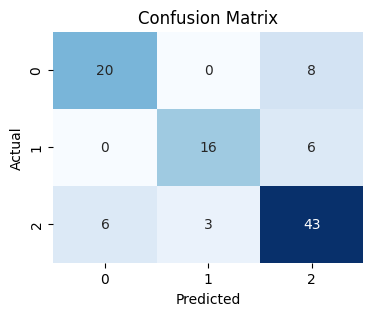

Best hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Random Forest Score: 0.8439197530864198
Best Random Forest Classifier Test Accuracy: 0.7745098039215687
Random Forest Classifier Classification Report:
               precision    recall  f1-score   support

  Economical       0.77      0.71      0.74        28
      Luxury       0.84      0.73      0.78        22
      Normal       0.75      0.83      0.79        52

    accuracy                           0.77       102
   macro avg       0.79      0.76      0.77       102
weighted avg       0.78      0.77      0.77       102



In [32]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

rf_classifier = RandomForestClassifier(random_state = 42)

grid_search = GridSearchCV(estimator = rf_classifier, param_grid = param_grid, cv = 5, n_jobs = 1, verbose = 0)

grid_search.fit(X_train, y_train)
best_rf_score = grid_search.best_score_
best_rf_accuracy = grid_search.score(X_test, y_test)

y_pred_rf = grid_search.predict(X_test)
rf_classification_report = classification_report(y_test, y_pred_rf)

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Best hyperparameters:", grid_search.best_params_)
print("Best Random Forest Score:", best_rf_score)
print("Best Random Forest Classifier Test Accuracy:", best_rf_accuracy)
print("Random Forest Classifier Classification Report:\n", rf_classification_report)

<font size=4>38 & 39- XGBoost. XGBoost employs a gradient boosting framework, where each new model is trained to correct the errors made by the previous models. XGBoost uses a clever optimization technique that minimizes a specific loss function by iteratively adding new trees to the ensemble. It employs a gradient boosting framework, where each new model is trained to correct the errors made by the previous models. It includes features such as parallel computing and tree pruning to enhance scalability and speed. Additionally, XGBoost incorporates regularization techniques to prevent overfitting and improve generalization performance.

While decision trees operate as standalone models, boosting trees utilize an ensemble approach to enhance predictive performance by combining multiple weak learners. Boosting algorithms are generally more robust and less prone to overfitting compared to individual decision trees.</font>

<font size=4>40- Evaluating. XGBoost has several hyperparameters such as: *learning_rate*: Controls the step size during the optimization process. Lower values make the model more robust but require more iterations. *n_estimators*: Specifies the number of boosting rounds or trees to build. Higher values increase model complexity but can lead to overfitting. *max_depth*: Limits the maximum depth of each tree in the ensemble. Deeper trees can capture more complex patterns but may overfit. *min_child_weight*: Minimum sum of instance weight needed in a child node. Higher values result in more conservative tree growth, reducing overfitting.</font>

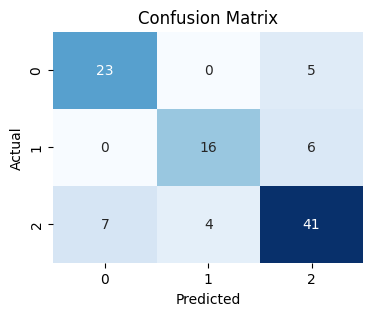

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 100}
Best XGBoost Score: 0.836604938271605
Best XGBoost Classifier Test Accuracy: 0.7843137254901961
XGBoost Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79        28
           1       0.80      0.73      0.76        22
           2       0.79      0.79      0.79        52

    accuracy                           0.78       102
   macro avg       0.79      0.78      0.78       102
weighted avg       0.78      0.78      0.78       102



In [33]:
param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'min_child_weight': [1, 3],
}

label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)

y_test_encoded = label_encoder.transform(y_test)

xgb_classifier = XGBClassifier(random_state = 42)

grid_search = GridSearchCV(estimator = xgb_classifier, param_grid = param_grid, cv = 5, n_jobs = 1, verbose = 0)

grid_search.fit(X_train, y_train_encoded)
best_xg_score = grid_search.best_score_
best_xg_accuracy = grid_search.score(X_test, y_test_encoded)

y_pred_xg = grid_search.predict(X_test)
xg_classification_report = classification_report(y_test_encoded, y_pred_xg)

cm = confusion_matrix(y_test_encoded, y_pred_xg)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Best hyperparameters:", grid_search.best_params_)
print("Best XGBoost Score:", best_xg_score)
print("Best XGBoost Classifier Test Accuracy:", best_xg_accuracy)
print("XGBoost Classifier Classification Report:\n", xg_classification_report)

<font size=5 color = "#663399" >  SVM</font>

<font size=4>40-1 Classification.</font>

In [34]:
svm_rbf = SVC(kernel = 'rbf', random_state = 42)
svm_linear = SVC(kernel = 'linear', random_state = 42)

svm_rbf.fit(X_train, y_train)
svm_linear.fit(X_train, y_train)

y_pred_rbf = svm_rbf.predict(X_test)
y_pred_linear = svm_linear.predict(X_test)

accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
accuracy_linear = accuracy_score(y_test, y_pred_linear)

print("Accuracy RBF kernel:", accuracy_rbf)
print("Accuracy Linear kernel:", accuracy_linear)

Accuracy RBF kernel: 0.5686274509803921
Accuracy Linear kernel: 0.7450980392156863


<font size=4>40-2 Results.</font>

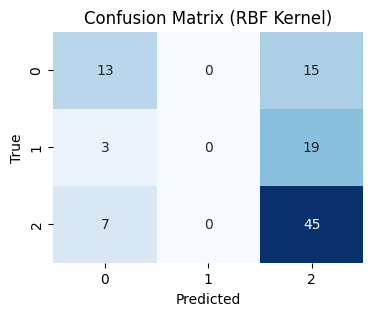

Classification Report RBF Kernel:
               precision    recall  f1-score   support

  Economical       0.57      0.46      0.51        28
      Luxury       1.00      0.00      0.00        22
      Normal       0.57      0.87      0.69        52

    accuracy                           0.57       102
   macro avg       0.71      0.44      0.40       102
weighted avg       0.66      0.57      0.49       102



In [35]:
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

plt.figure(figsize=(4, 3))
sns.heatmap(cm_rbf, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)
plt.title('Confusion Matrix (RBF Kernel)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

report_rbf = classification_report(y_test, y_pred_rbf, zero_division = 1)

print("Classification Report RBF Kernel:\n", report_rbf)

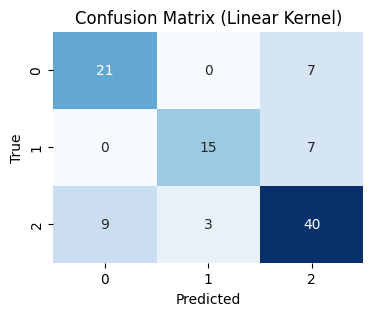

Classification Report Linear Kernel:
               precision    recall  f1-score   support

  Economical       0.70      0.75      0.72        28
      Luxury       0.83      0.68      0.75        22
      Normal       0.74      0.77      0.75        52

    accuracy                           0.75       102
   macro avg       0.76      0.73      0.74       102
weighted avg       0.75      0.75      0.75       102



In [36]:
cm_linear = confusion_matrix(y_test, y_pred_linear)

plt.figure(figsize=(4, 3))
sns.heatmap(cm_linear, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)
plt.title('Confusion Matrix (Linear Kernel)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

report_linear = classification_report(y_test, y_pred_linear, zero_division = 1)

print("Classification Report Linear Kernel:\n", report_linear)

<font size=4>40-3 Best Method. For a small search space (like the one here) or when computational resources are not a limitation, ```Grid Search``` can be a good choice as it exhaustively searches through all possible combinations.</font>

<font size=4>40-4 Best Classifier.</font>

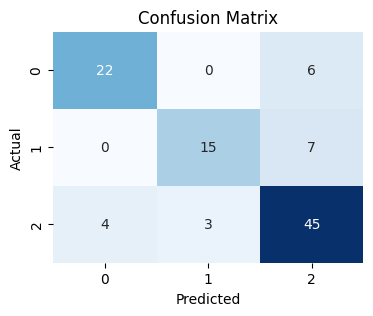

Best hyperparameters for Random Search: {'svm__kernel': 'rbf', 'svm__gamma': 'auto', 'svm__C': 6.7}
Best Random Search Score: 0.7894753086419752
Best Random Search Classifier Test Accuracy: 0.803921568627451
Random Search Classifier Classification Report:
               precision    recall  f1-score   support

  Economical       0.85      0.79      0.81        28
      Luxury       0.83      0.68      0.75        22
      Normal       0.78      0.87      0.82        52

    accuracy                           0.80       102
   macro avg       0.82      0.78      0.79       102
weighted avg       0.81      0.80      0.80       102



In [37]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

random_param_grid = {
    'svm__C': np.linspace(0.1, 10, 10),
    'svm__gamma': ['scale', 'auto'],
    'svm__kernel': ['linear', 'rbf']
}

random_search = RandomizedSearchCV(pipeline, param_distributions = random_param_grid, n_iter = 10, cv = 5, verbose = 0, random_state = 42, n_jobs = 1)

random_search.fit(X_train, y_train)
best_rs_score = random_search.best_score_
best_rs_accuracy = random_search.score(X_test, y_test)

best_random_model = random_search.best_estimator_
y_pred_random = best_random_model.predict(X_test)
rs_classification_report = classification_report(y_test, y_pred_random)

cm = confusion_matrix(y_test, y_pred_random)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Best hyperparameters for Random Search:", random_search.best_params_)
print("Best Random Search Score:", best_rs_score)
print("Best Random Search Classifier Test Accuracy:", best_rs_accuracy)
print("Random Search Classifier Classification Report:\n", rs_classification_report)

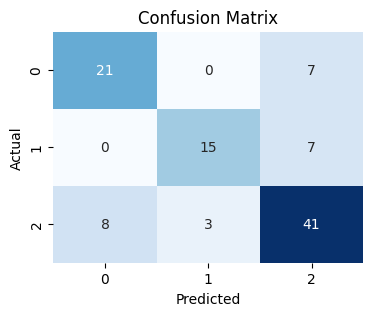

Best hyperparameters for Grid Search: {'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
Best Grid Search Score: 0.7895987654320987
Best Grid Search Classifier Test Accuracy: 0.7549019607843137
Grid Search Classifier Classification Report:
               precision    recall  f1-score   support

  Economical       0.72      0.75      0.74        28
      Luxury       0.83      0.68      0.75        22
      Normal       0.75      0.79      0.77        52

    accuracy                           0.75       102
   macro avg       0.77      0.74      0.75       102
weighted avg       0.76      0.75      0.75       102



In [38]:
grid_param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': ['scale', 'auto'],
    'svm__kernel': ['linear', 'rbf']
}

grid_search = GridSearchCV(pipeline, param_grid = grid_param_grid, cv = 5, verbose = 0, n_jobs = 1)

grid_search.fit(X_train, y_train)
best_gs_score = grid_search.best_score_
best_gs_accuracy = grid_search.score(X_test, y_test)

best_grid_model = grid_search.best_estimator_
y_pred_grid = best_grid_model.predict(X_test)
gs_classification_report = classification_report(y_test, y_pred_grid)

cm = confusion_matrix(y_test, y_pred_grid)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Best hyperparameters for Grid Search:", grid_search.best_params_)
print("Best Grid Search Score:", best_gs_score)
print("Best Grid Search Classifier Test Accuracy:", best_gs_accuracy)
print("Grid Search Classifier Classification Report:\n", gs_classification_report)

<font size=5 color = "#663399" > Conclusion</font>

<font size=4> This project applyed machine learning (ML) techniques on a dataset from data gathering to model evaluation, specifically focusing on classification tasks. Here's a breakdown of our journey:

```Data Gathering```
The first step involved gathering the required data. We assumed the data was available in an Excel file, DataSet.xlsx, from which we could read directly into a Pandas DataFrame. This step is crucial as it sets the foundation for all subsequent analysis and modeling.

```Data Preprocessing```
Next, we focused on preprocessing the data, which included:

1- Handling missing values through imputation.

2- Splitting the data into training and testing sets to ensure the model could be trained and then independently evaluated.

```Exploratory Data Analysis (EDA)```
We performed EDA to understand the underlying patterns, relationships, and anomalies in the data. This included visualizing distributions, checking correlations, and identifying any peculiar trends or outliers in the dataset.

```Machine Learning Models```
We implemented two major machine learning models using Scikit-learn:

1- K-Nearest Neighbors (KNN)
   - We used both Grid Search and Random Search for hyperparameter tuning.
   - We trained and tested the model, evaluated its performance, and visualized the results.
   
2- Support Vector Machine (SVM)
   - We classified the data using SVM with RBF and Linear kernels.
   - We applied both Grid Search and Random Search to find the best classifier settings for the two kernels.
   - We carefully chose between Grid Search and Random Search based on their characteristics and the computational cost. Grid Search being exhaustive was considered when precision in hyperparameter tuning was critical, while Random Search was utilized for its efficiency in larger parameter spaces.

```Results and Evaluation```
For each model, we:

1- Presented the best hyperparameters found through the tuning process.

2- Evaluated the models using classification reports which provided insights into their accuracy, precision, recall, and F1-scores.

3- Discussed the trade-offs between model complexity and performance, ensuring not to overfit the training data.

```Conclusion```
Through this project, we demonstrated a structured approach to handling a predictive analysis task from start to finish. The application of KNN and SVM allowed us to explore different aspects of ML modeling, including the necessity of appropriate hyperparameter tuning and model evaluation strategies. The iterative process of refining the models based on the results of hyperparameter tuning highlighted the importance of a methodical approach to ML implementation.

The flexibility in choosing between Grid Search and Random Search allowed us to balance between computational efficiency and thoroughness, ensuring the best possible model performance within practical constraints.</font>